# Guitar tuner experiment 1

This experiment tries to find a naive way to calculate the tune

In [1]:
import numpy as np
from scipy.fftpack import rfft
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile

import fftlib

matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)

In [2]:
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)

In [61]:
FREQ = 110
NOTE = "la"

sample_duration = 200. / 1000.

INPUT_FILE = f"sounds/{NOTE}{FREQ}.wav"

rate, data = wavfile.read(INPUT_FILE)
duration = len(data) / rate
print(f"working with file `{INPUT_FILE}`")
print(f"rate: {rate} Hz")
print(f"samples: {len(data)}")
print(f"duration: {duration:.2f} s")

working with file `sounds/la110.wav`
rate: 44100 Hz
samples: 507392
duration: 11.51 s


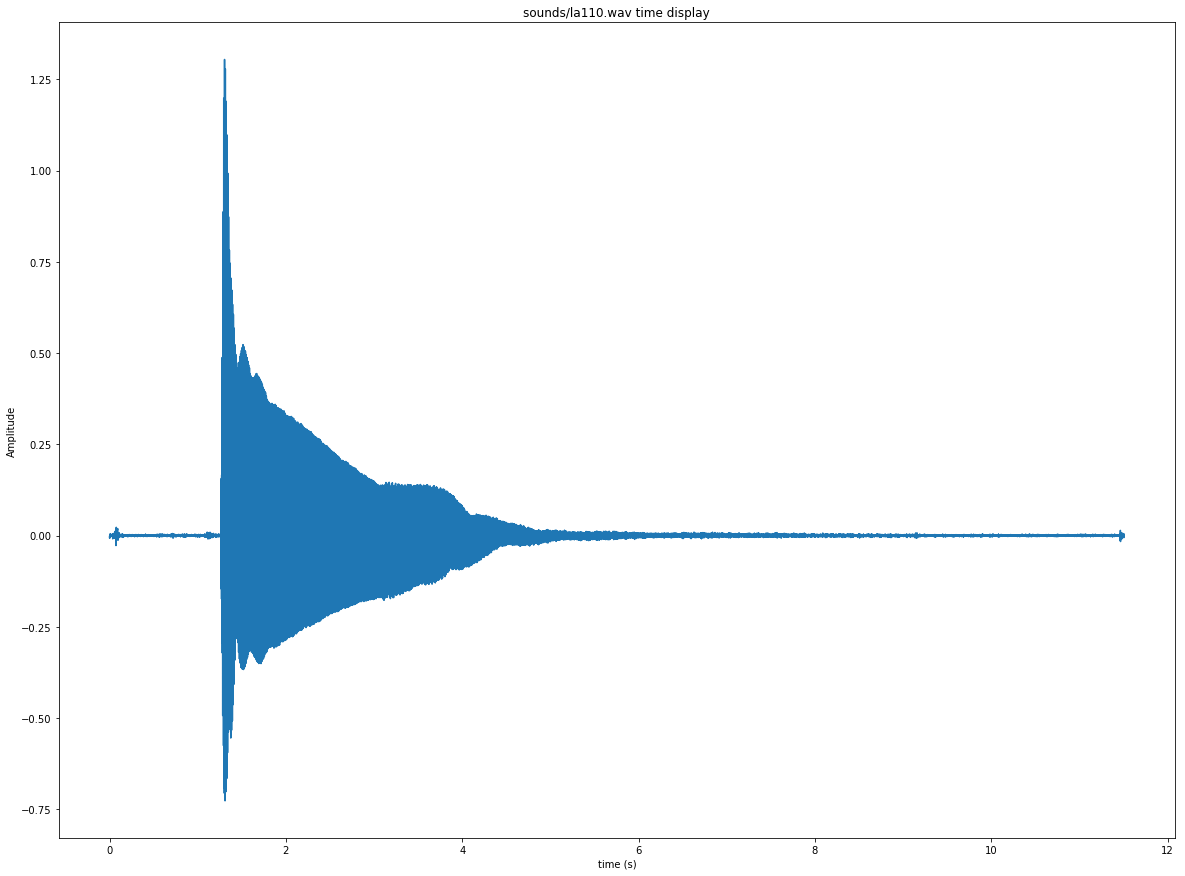

In [62]:
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)
fig, ax = plt.subplots()
plt.plot(np.linspace(0, duration, len(data)),
         data)
ax.set(
    xlabel='time (s)', ylabel='Amplitude',
    title=f"{INPUT_FILE} time display")
plt.show()

In [63]:

samples = fftlib.sampling(rate, data.T, sample_duration)
print(f"Number of samples: {len(samples)}")
print(f"Samples duration:  {sample_duration:.2f}s")

Number of samples: 57
Samples duration:  0.20s


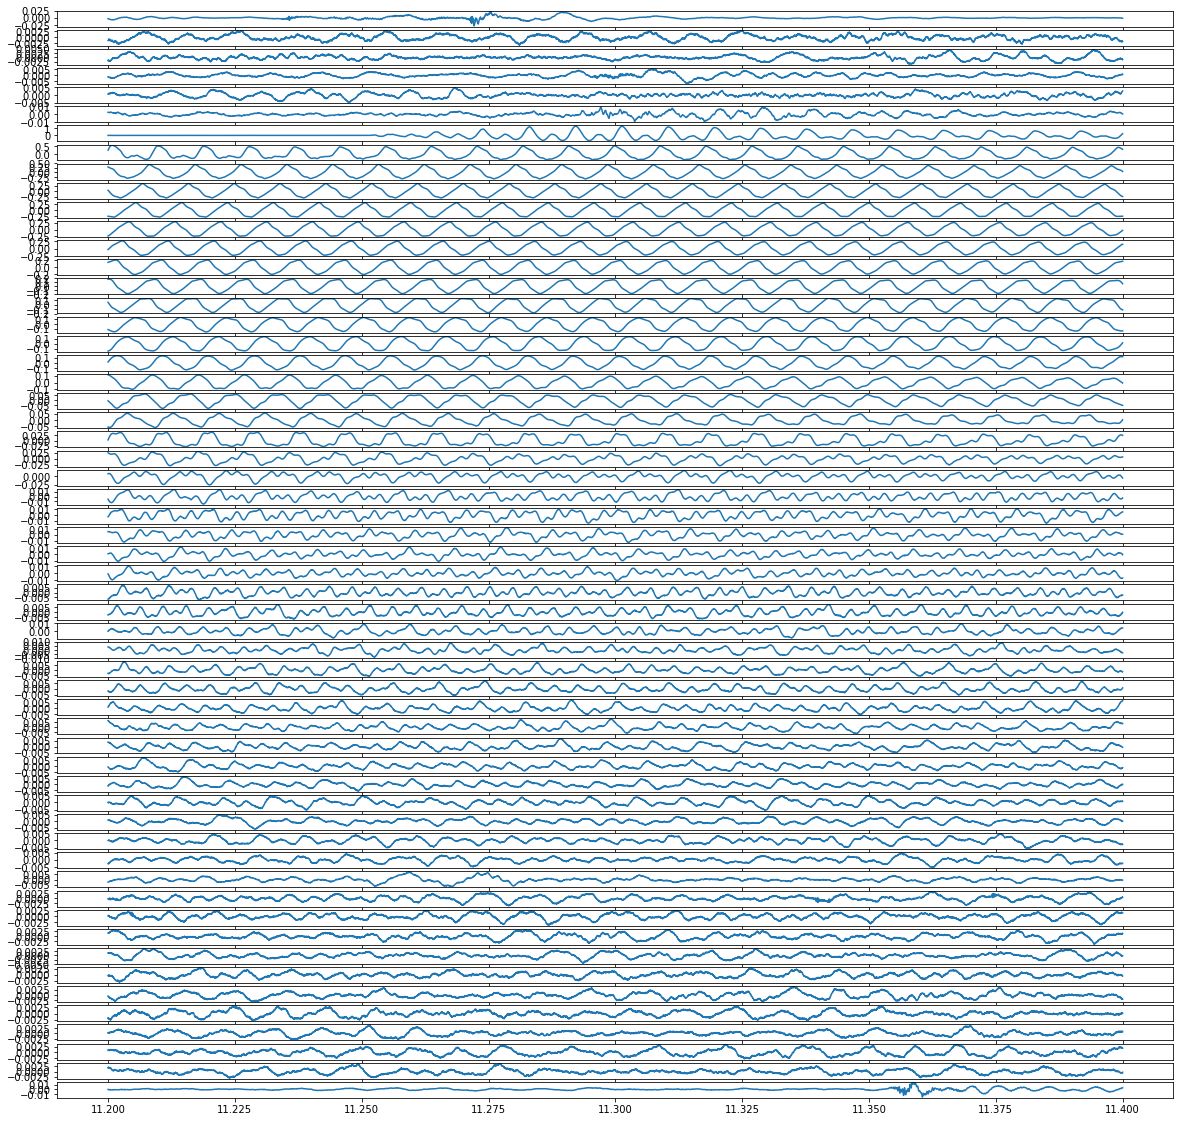

In [64]:
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
for i, sample in enumerate(samples):
    plt.subplot(len(samples),1, i + 1)
    plt.plot(np.linspace(sample_duration*i, sample_duration*(i+1), len(sample)),
             sample)
    # plt.xlabel('time (s)')
    # plt.title(f"sample {i}")

plt.show()

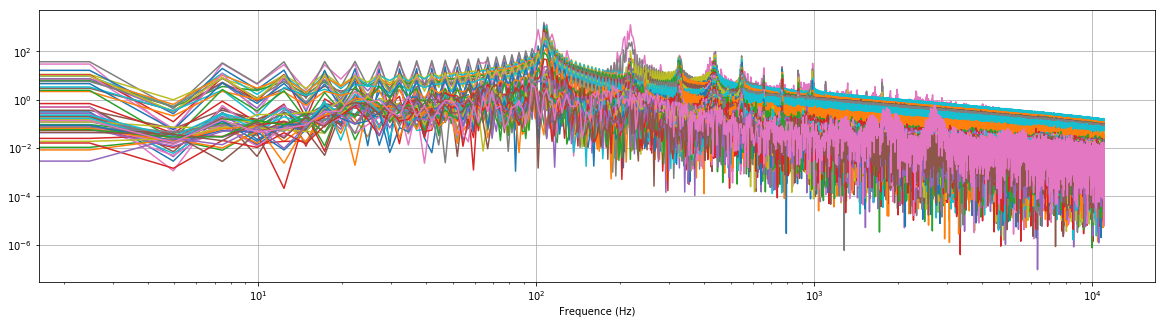

In [65]:
matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)
fourier_samples = []
frequencies = None
for i, sample in enumerate(samples):
    frequencies, amp = fftlib.analysis(rate, sample)
    fourier_samples.append(amp)
    plt.loglog(frequencies, amp)
    plt.xlabel('Frequence (Hz)')
    plt.grid()
    # plt.title(f"Sample {i} Fourier transform")
    # plt.show()

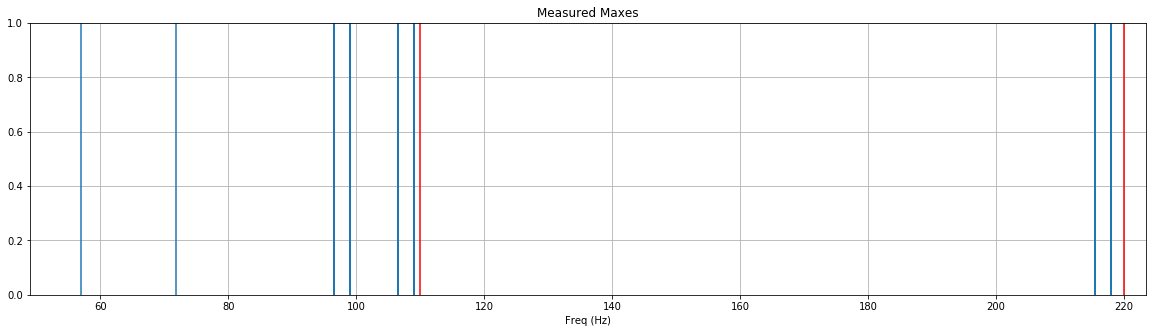

In [66]:
maxes = [(frequencies[np.argmax(amp)], np.max(amp)) for amp in fourier_samples]

for i, (note, amp) in enumerate(maxes):
    plt.axvline(x=note)
plt.axvline(x=FREQ, color="red")
plt.axvline(x=2*FREQ, color="red")
plt.xlabel("Freq (Hz)")
plt.title("Measured Maxes")
plt.grid()
plt.show()

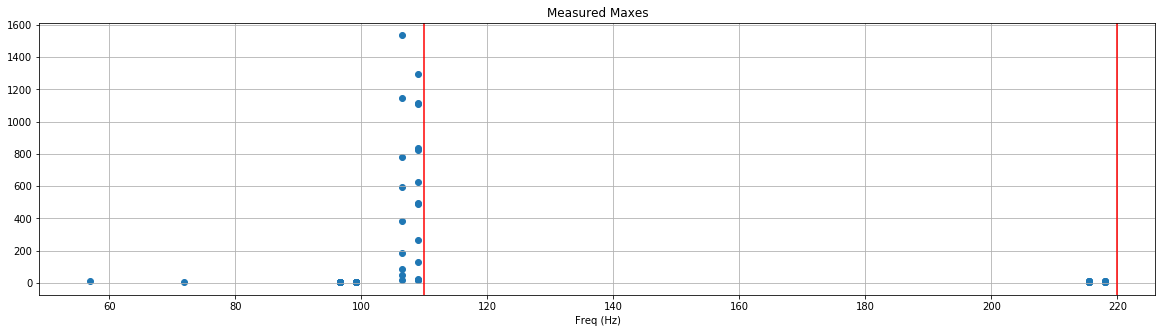

In [67]:
plt.scatter(
    x=[x for x, _ in maxes],
    y=[y for _, y in maxes]
)

plt.axvline(x=FREQ, color="red")
plt.axvline(x=2*FREQ, color="red")
plt.xlabel("Freq (Hz)")
plt.title("Measured Maxes")
plt.grid()
plt.show()

Average:
Measured note: 133.90Hz
Expected note: 110.00Hz
Diff:          -23.90Hz
%:             -21.73%
 
Ponderated Average:
Measured note: 109.20Hz
Expected note: 110.00Hz
%:             0.73%
 


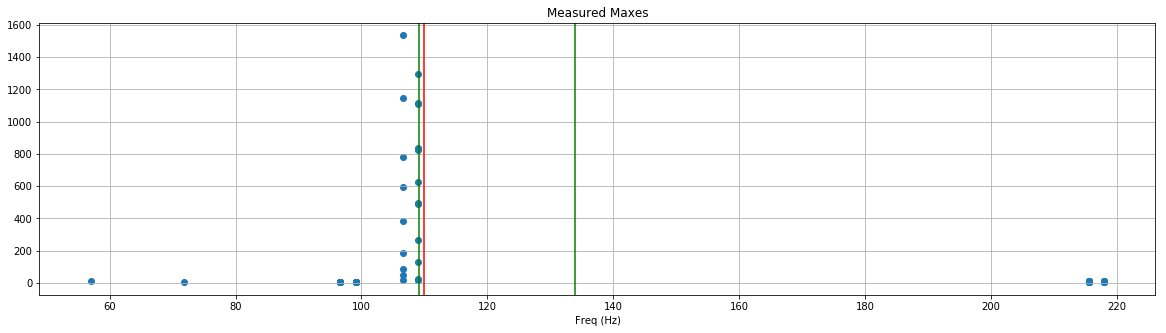

In [71]:
note = sum(x for x, _ in maxes)/ sum(1 for _, _ in maxes)
plt.axvline(x=note, color="green")

print(f"Average:")
print(f"Measured note: {note:.2f}Hz")
print(f"Expected note: {FREQ:.2f}Hz")
print(f"Diff:          {FREQ - note:.2f}Hz")
print(f"%:             {(FREQ - note)/FREQ*100:.2f}%")
print(f" ")

note = sum(x*y for x, y in maxes)/sum(y for _, y in maxes)
plt.axvline(x=note, color="green")

print(f"Ponderated Average:")
print(f"Measured note: {note:.2f}Hz")
print(f"Expected note: {FREQ:.2f}Hz")
print(f"%:             {(FREQ - note)/FREQ*100:.2f}%")
print(f" ")

plt.scatter(
    x=[x for x, _ in maxes],
    y=[y for _, y in maxes]
)
plt.axvline(x=FREQ, color="red")
plt.xlabel("Freq (Hz)")
plt.title("Measured Maxes")
plt.grid()
plt.show()